In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [145]:
df = pd.read_csv("Game-of-thones-deaths.csv")
df['Killers House'].unique()

array(['None', 'House Stark', 'House Arryn', 'Dothraki',
       'House Lannister', 'House Bolton', 'House Trant', "Night's Watch",
       'House Targaryen', 'House Payne', 'Lord of Light',
       "House Baratheon of King's Landing", 'House Clegane',
       'House Tarth', 'Faceless Men', 'Unknown', 'Warlocks of Qarth',
       'House Baratheon of Dragonstone', 'House Tyrell', 'House Karstark',
       'Free Folk', 'House Frey', 'House Baelish', 'House Greyjoy',
       'Sons of the Harpy', 'Smallfolk', 'House Martell', 'White Walkers',
       'Brotherhood Without Banners', 'The Masters', 'House Umber',
       'Sand Snakes', 'House Mormont'], dtype=object)

In [146]:
df.dropna(axis=1, how='all', inplace=True)

In [147]:
df.head()

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1


In [148]:
#drop rows which has None in the column
df = df.dropna(axis=0, how='any')

In [149]:
df['Killers House'].unique()

array(['None', 'House Stark', 'House Arryn', 'Dothraki',
       'House Lannister', 'House Bolton', 'House Trant', "Night's Watch",
       'House Targaryen', 'House Payne', 'Lord of Light',
       "House Baratheon of King's Landing", 'House Clegane',
       'House Tarth', 'Faceless Men', 'Unknown', 'Warlocks of Qarth',
       'House Baratheon of Dragonstone', 'House Tyrell', 'House Karstark',
       'Free Folk', 'House Frey', 'House Baelish', 'House Greyjoy',
       'Sons of the Harpy', 'Smallfolk', 'House Martell', 'White Walkers',
       'Brotherhood Without Banners', 'The Masters', 'House Umber',
       'Sand Snakes', 'House Mormont'], dtype=object)

In [150]:
#filter data for House Stark, House Lannister, and House Targaryen
df_stark = df[df['Killers House'] == 'House Stark']
df_lannister = df[df['Killers House'] == 'House Lannister']
df_targaryen = df[df['Killers House'] == 'House Targaryen']
df_bolton = df[df['Killers House'] == 'House Bolton']
df_greyjoy = df[df['Killers House'] == 'House Greyjoy']
df_frey = df[df['Killers House'] == 'House Frey']
df_tyrell = df[df['Killers House'] == 'House Tyrell']
df_white_walkers = df[df['Killers House'] == 'White Walkers']
df_baratheon = df[df['Killers House'] == 'House Baratheon of Dragonstone']
df_Dothraki = df[df['Killers House'] == 'Dothraki']
df_Mormont = df[df['Killers House'] == 'House Mormont']



In [151]:
df_got = pd.concat([df_stark, df_lannister, df_targaryen, df_bolton, df_greyjoy, df_frey, df_tyrell, df_white_walkers, df_baratheon, df_Dothraki, df_Mormont])

In [152]:
#drop Allegiance = None
df_got = df_got[df_got['Allegiance'].notnull()]
df_got['Killers House'].unique()

array(['House Stark', 'House Lannister', 'House Targaryen',
       'House Bolton', 'House Greyjoy', 'House Frey', 'House Tyrell',
       'White Walkers', 'House Baratheon of Dragonstone', 'Dothraki',
       'House Mormont'], dtype=object)

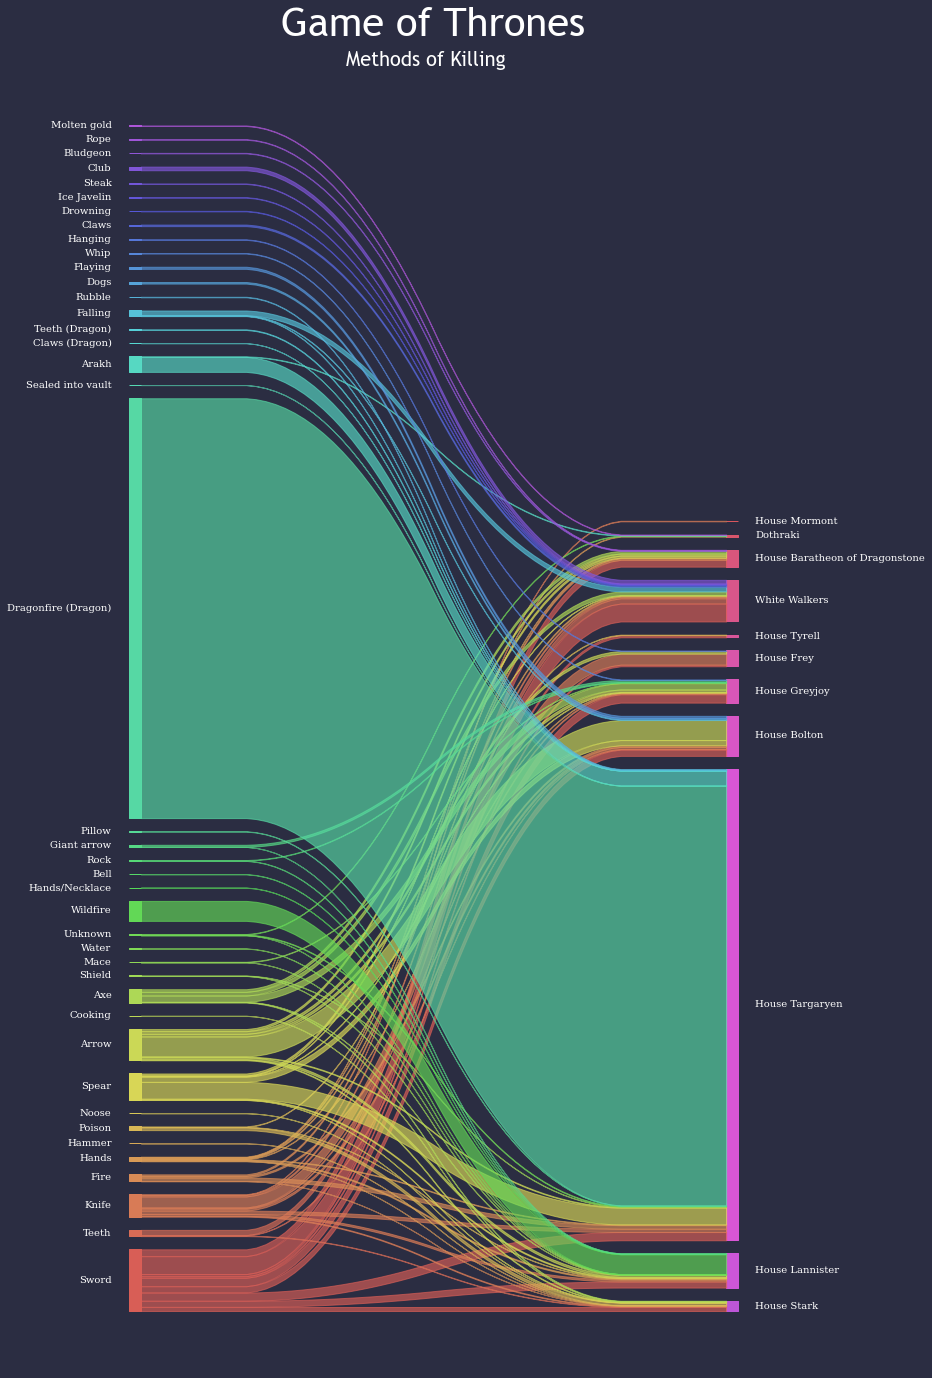

In [153]:
sankey(
    left=df_got["Method"], 
    right=df_got["Killers House"], 
    leftWeight= df_got["Season"], 
    rightWeight=df_got["Season"], 
    aspect=20, fontsize=10
)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(12, 24)

# Set the color of the background to white
fig.set_facecolor("#2b2d42")

#font color to white
plt.rcParams['text.color'] = 'white'

#Font to Trebuchet MS
plt.rcParams['font.family'] = 'Trebuchet MS'

#font size to 12
plt.rcParams['font.size'] = 30

#Title
plt.title("Game of Thrones", fontsize=40, fontname='Trebuchet MS', pad=30)
#subtitle 
plt.suptitle(" Methods of Killing", fontsize=20, fontname='Trebuchet MS', y=0.889)

fig.savefig("Game Of Thrones.png", bbox_inches="tight", dpi=800)